# Mini project 2. Group 8.
## Group Members:
Ankit Mishra, Aniket Ghosh, Bikash Kumar, Bhushan Kape.
Each group member has 25% contribution.

In [10]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import bisect
from scipy.special import sph_harm as sph
from scipy.integrate import simpson as simp


## Hyrdrogen Atom energy Levels.

n ,l , E =  1 0 -0.49906443976052095
n ,l , E =  2 0 -0.12488297822885171
n ,l , E =  3 0 -0.055520874844863496
n ,l , E =  4 0 -0.03123536745272524
n ,l , E =  5 0 -0.01999250755272752
n ,l , E =  6 0 -0.013884127216413073
n ,l , E =  7 0 -0.01013450350053554
n ,l , E =  8 0 -0.006936670446767854
n ,l , E =  2 1 -0.1250004860293119
n ,l , E =  3 1 -0.05555572636239216
n ,l , E =  4 1 -0.0312500760238616
n ,l , E =  5 1 -0.020000039806589303
n ,l , E =  6 1 -0.013888570470735249
n ,l , E =  7 1 -0.010145456744357758
n ,l , E =  8 1 -0.007000326225533895
n ,l , E =  9 1 -0.0030945431310681623
n ,l , E =  3 2 -0.05555555557976986
n ,l , E =  4 2 -0.031250000016349776
n ,l , E =  5 2 -0.01999999998282215
n ,l , E =  6 2 -0.013888670323002545
n ,l , E =  7 2 -0.010159226046461071
n ,l , E =  8 2 -0.007112950460571253
n ,l , E =  9 2 -0.003373179124254191
n ,l , E =  4 3 -0.03125000000186256
n ,l , E =  5 3 -0.01999999999068668
n ,l , E =  6 3 -0.013888783695176144
n ,l , E =  7 3 -0.010175

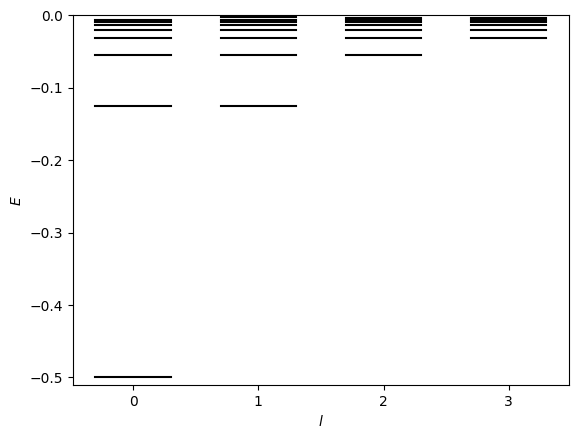

In [3]:

def Veff(r):                    # effective potential
    return (L*(L+1)/(2*mass*r)-1)/r
    
def f(r):                       # Sch eqn in Numerov form
    return 2*mass*(E-Veff(r))
    
def numerov(f, u, n, x, h):     # Numerov integrator for $u''+f(x)u=0$
    nodes, c = 0, h*h/12.       # given $[u_0,u_1]$, return $[u_0,u_1,...,u_{n+1}]$
    f0, f1 = 0., f(x+h)
    for i in range(n):
        x += h
        f2 = f(x+h)             # Numerov method below, 
        u.append((2*(1-5*c*f1)*u[i+1] - (1+c*f0)*u[i])/(1+c*f2))  
        f0, f1 = f1, f2
        if (u[-1]*u[-2] < 0.0): nodes += 1
    return u, nodes             # return u, nodes
    
def shoot(En):
    global E                    # E needed in f(r)
    E, c, xm = En, (h*h)/6. ,xL + M*h
    # print(xL,xR,h,xm)
    wfup, nup = numerov(f, [0,.1], M, xL, h)
    wfdn, ndn = numerov(f, [0,.1], N-M, xR, -h)     # $f'$ from 
    dup = ((1+c*f(xm+h))*wfup[-1] - (1+c*f(xm-h))*wfup[-3])/(h+h)
    ddn = ((1+c*f(xm+h))*wfdn[-3] - (1+c*f(xm-h))*wfdn[-1])/(h+h)
    return dup*wfdn[-2] - wfup[-2]*ddn

xL, xR, N = 0., 120., 2200          # limits, intervals
h, mass = (xR-xL)/N, 1.0            # step size, mass
Lmax, EL, M = 4, [], 100            # M = matching point
x = np.linspace(xL,xR,2200+1)
Estart, dE = -.5/np.arange(1, Lmax+1)**2-.1, 0.001      # $\sim -1/2n^2$
for L in range(Lmax):
    n, E1, Ea = L+1, Estart[L], []
    while (E1 < -4*dE):             # sweep E range for each L
        E1 += dE
        if (shoot(E1)*shoot(E1 + dE) > 0): continue
        E = bisect(shoot, E1, E1 + dE)
        Ea.append(E)
        wfup, nup = numerov(f, [0,.1], M-1, xL, h)      # calc wf
        wfdn, ndn = numerov(f, [0,.1], N-M-1, xR, -h)
        psix = np.concatenate((wfup[:-1], wfdn[::-1]))
        psix[M:] *= wfup[-1]/wfdn[-1]                   # match
        print ('n ,l , E = ', n, L, E)
        n += 1
    EL.append(Ea)
    
plt.figure()                        # plot energy levels
for L in range(Lmax):
    for i in range(len(EL[L])):
        plt.plot([L-.3, L+.3], [EL[L][i]]*2, 'k-')
        # print(L,i,EL[L][i])
    plt.xlabel('$l$'), plt.ylabel('$E$')
    plt.ylim(-.51, 0), plt.xticks(range(Lmax))
plt.show()
 

## Plots of radial wavefunction.

1 0 -0.49906443976052095
2 0 -0.12488297822885171
2 1 -0.1250004860293119
3 0 -0.055520874844863496
3 1 -0.05555572636239216
3 2 -0.05555555557976986


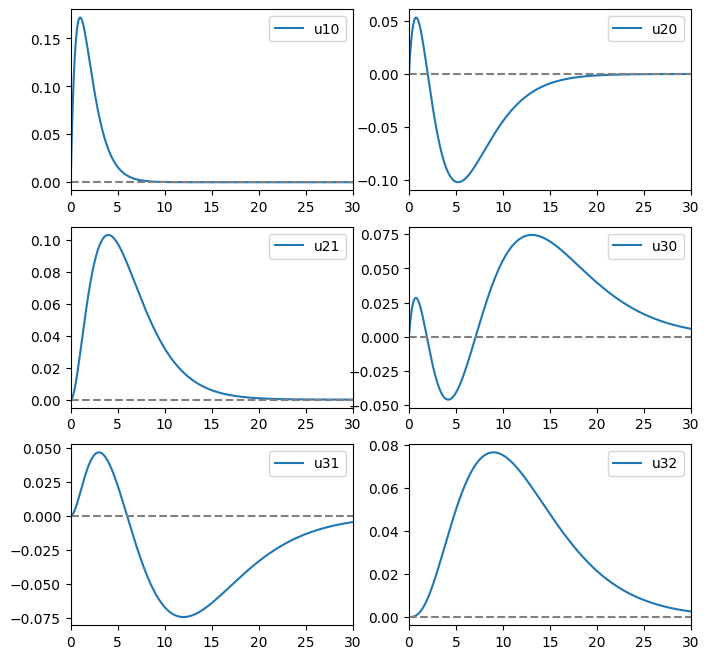

In [16]:
plt.figure(figsize=(8,8))
xL, xR, N = 0., 120., 2200  
h, mass = (xR-xL)/N, 1.0   
x = np.linspace(xL,xR,2200+1)    
M = 100 # matching point
c= 1
for j in range(1,4):
    for L in range(j):
        E = EL[L][j-L-1]
        print(j,L,E)
        wfup, nup = numerov(f, [0,.1], M-1, xL, h)      # calc wf
        wfdn, ndn = numerov(f, [0,.1], N-M-1, xR, -h)
        psix = np.concatenate((wfup[:-1], wfdn[::-1]))
        psix[M:] *= wfup[-1]/wfdn[-1] 
        psix = psix/np.linalg.norm(psix)
        plt.subplot(3,2,c)
        plt.plot(x,psix,label='u'+str(j)+str(L))
        plt.legend()
        plt.axhline(0,c='grey',ls='--')
        plt.xlim(0,30)
        c+=1
        # plt.show()

## Nodes
We see from the plot that $u_{nl}$ has $n-l-1$ nodes. For instnace this is zero for $u_{32} $ ($3s$) state as $3-2-1=0$. The reason for this is that in $3D$ the angular part of the wavefuntion $\psi_{nlm} = R_{nl}Y_{lm}$, $Y_{lm}$ also have $l$ nodes since there are 
* $m$ nodes in $\phi$ direction and
* $n-l$ nodes in $\theta$ direction. 

## Size of H atom

n , l ,E = 1 0 -0.49906443976052095
n , l ,E = 2 1 -0.1250004860293119
n , l ,E = 3 2 -0.05555555557976986


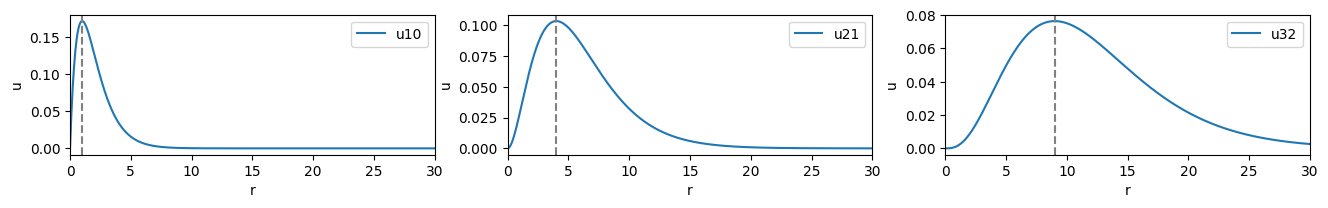

In [6]:
plt.figure(figsize=(16,4))
xL, xR, N = 0., 120., 2200  
h, mass = (xR-xL)/N, 1.0   
x = np.linspace(xL,xR,2200+1)    
M = 50 # matching point
c= 1
for j in range(1,4):
    L=j-1
    E = EL[L][j-L-1]
    print('n , l ,E =', j , L, E)
    wfup, nup = numerov(f, [0,.1], M-1, xL, h)      # calc wf
    wfdn, ndn = numerov(f, [0,.1], N-M-1, xR, -h)
    psix = np.concatenate((wfup[:-1], wfdn[::-1]))
    psix[M:] *= wfup[-1]/wfdn[-1] 
    norm = np.linalg.norm(psix)
    plt.subplot(2,3,c)
    plt.plot(x,psix/norm,label='u'+str(j)+str(L))
    plt.axvline(j**2,c='grey',ls='--')
    plt.ylabel('u'), plt.xlabel('r')

    plt.legend(), plt.xlim(0,30)

    c+=1
    # plt.show()

* For $u_{n,l}$ states have $n-l-1$ nodes, so states with max  $l$, i.e  $u_{n,n-1}$ has $n-(n-1)-1 = 0$ nodes. They have single peak in their radial wavefuntion as seen from the three plots above. So we use these states to define the size of atom for a given $n$. We use the peak distance of $u_{n,n-1}$ to define the size of atom for a given $n$.
* We also see that vertical lines mark $n^2$. Which shows that peak distance varies as $r=n^2$ so the size of atom is proportional to $n^2$.

## Number of bound states
* The condtion for bound state for 1/r potential is  that $E<V(\infty)$. And the energy of a bound state for hydrogen is $E = -0.5/n^2$ (a.u). So in principle , Hydrogen atom can have infinitely many bound states with $E<0$. 
* But in reality, as we saw above size of atom increases as $n^2$. So for large $n$, the probability distribution becomes very 'dilute' and random perturbation is enough to knock out H atom from it bound state. Atom in very large $n$ state are called Rydberg atoms.

# Density Plots

n , l ,E = 3 3 -0.03125000000186256


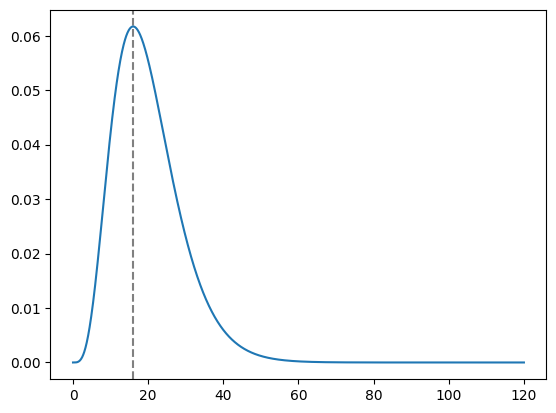

In [7]:
x = np.linspace(xL,xR,2200+1)   
xL, xR, N = 0., 120., 2200  
h, mass = (xR-xL)/N, 1.0  
M,L = 100 , 3 # Matchig Point, angluar qntm numbr
E = EL[3][0]
print('n , l ,E =', j , L, E)
wfup, nup = numerov(f, [0,.1], M-1, xL, h)      # calc wf
wfdn, ndn = numerov(f, [0,.1], N-M-1, xR, -h)
psix = np.concatenate((wfup[:-1], wfdn[::-1]))
psix[M:] *= wfup[-1]/wfdn[-1] 
norm = np.linalg.norm(psix)
psix = psix/norm
plt.axvline(16,c='grey',ls='--')
plt.plot(x,psix,label='u43')
plt.xlabel('r'),plt.ylabel('u'), plt.legend()

## Probability density in zx plane
Here we use scipy to get $Y_3^m$ and use $u_{43}= r^4e^{-r/4}$ to plot $|u_{43} Y_3^m|^2$.

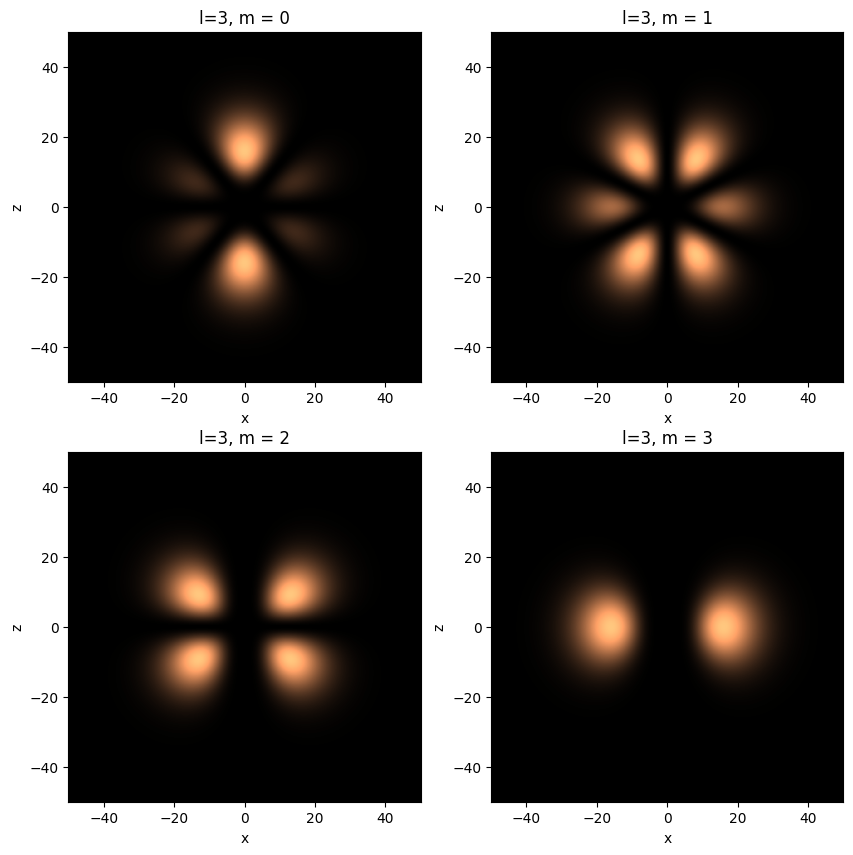

In [9]:
# # sph_harm(m, l, phi, theta, out=None)
plt.figure(figsize=(10,10))
for i in range(4):
    l,m = 3,i
    X,Y = np.meshgrid(x,x)-60*np.ones((2201,2201))
    Y = Y + 1e-10
    ang_fn = np.abs(sph(m,l,0,np.arctan(X/Y)))
    R = np.sqrt(X**2+Y**2)
    radial = (R**3)*np.exp(-R/4)
    pdf = (R*radial*ang_fn)**2
    plt.subplot(2,2,i+1)
    plt.pcolormesh(X,Y,pdf ,cmap='copper')
    plt.title('l=3, m = '+str(i))
    plt.xlim(-50,50),plt.ylim(-50,50)
    plt.xlabel('x'),plt.ylabel('z')


## Modifying Coulomb potenital.
We modify the coulomb potential to $V_\epsilon = \frac{-1}{r^{1+ \epsilon}}$. For $\epsilon = 0.01, 0.05, 0.1$ we see how the energy levels shift.

n ,l , E =  1 0 -0.5391151974555104
n ,l , E =  2 0 -0.10443901498801961
n ,l , E =  3 0 -0.03954640486650118
n ,l , E =  4 0 -0.01978149751014954
n ,l , E =  5 0 -0.011539125574752144
n ,l , E =  6 0 -0.007404596058651256
n ,l , E =  7 0 -0.004612666225060273
n ,l , E =  2 1 -0.09599358345009375
n ,l , E =  3 1 -0.03708135419152662
n ,l , E =  4 1 -0.01877971495874208
n ,l , E =  5 1 -0.01104731932096165
n ,l , E =  6 1 -0.007126660374924353
n ,l , E =  7 1 -0.004392961518838815
n ,l , E =  3 2 -0.03522755929972552
n ,l , E =  4 2 -0.01798401278774759
n ,l , E =  5 2 -0.01064144381653091
n ,l , E =  6 2 -0.006894979351717437
n ,l , E =  7 2 -0.004262931322264875


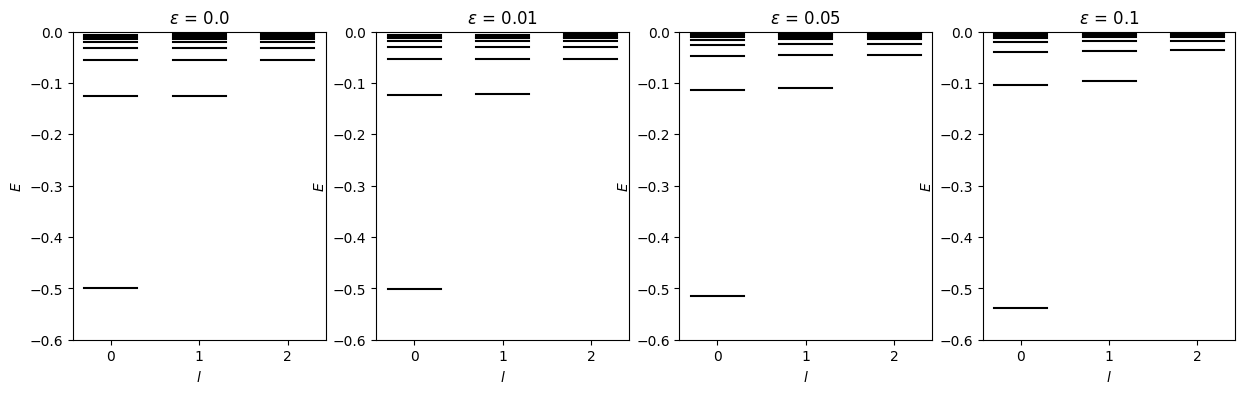

In [12]:

def Veff(r):
                        # effective potential
    return L*(L+1)/(2*mass*r*r) -1/r**(1+eps)

c = 1 # subplot index counter
eps_array = [0.0,0.01,0.05,0.1]
plt.figure(figsize=(15,4))
for eps in eps_array:   
    def shoot(En):
        global E                    # E needed in f(r)
        E, c, xm = En, (h*h)/6. ,xL + M*h
        # print(xL,xR,h,xm)
        wfup, nup = numerov(f, [0,.1], M, xL, h)
        wfdn, ndn = numerov(f, [0,.1], N-M, xR, -h)     # $f'$ from 
        dup = ((1+c*f(xm+h))*wfup[-1] - (1+c*f(xm-h))*wfup[-3])/(h+h)
        ddn = ((1+c*f(xm+h))*wfdn[-3] - (1+c*f(xm-h))*wfdn[-1])/(h+h)
        return dup*wfdn[-2] - wfup[-2]*ddn

    xL, xR, N = 0., 120., 2200          # limits, intervals
    h, mass = (xR-xL)/N, 1.0            # step size, mass
    Lmax, EL, M = 3, [], 1000            # M = matching point
    x = np.linspace(xL,xR,2200+1)
    Estart, dE = -.5/np.arange(1, Lmax+1)**2-.1, 0.001      # $\sim -1/2n^2$
    for L in range(Lmax):
        n, E1, Ea = L+1, Estart[L], []
        while (E1 < -4*dE):             # sweep E range for each L
            E1 += dE
            if (shoot(E1)*shoot(E1 + dE) > 0): continue
            E = bisect(shoot, E1, E1 + dE)
            Ea.append(E)
            wfup, nup = numerov(f, [0,.1], M-1, xL, h)      # calc wf
            wfdn, ndn = numerov(f, [0,.1], N-M-1, xR, -h)
            psix = np.concatenate((wfup[:-1], wfdn[::-1]))
            psix[M:] *= wfup[-1]/wfdn[-1]   # match
            if eps==0.1:
                print ('n ,l , E = ', n, L, E)
            n += 1
        EL.append(Ea)
        
    plt.subplot(1,4,c)
    plt.title( '$\epsilon$ = '+str(eps))   
    # plt.xlabel()                    # plot energy levels
    for L in range(Lmax):
        for i in range(len(EL[L])):
            
            plt.plot([L-.3, L+.3], [EL[L][i]]*2, 'k-')
        plt.xlabel('$l$'), plt.ylabel('$E$')
        plt.ylim(-.6, 0), plt.xticks(range(Lmax))
    # plt.show()
    c += 1
 

We see that bound state energies increase except for $1s$ state. We explain this with the help of plot below:

Text(0.5, 0.98, 'V vs r')

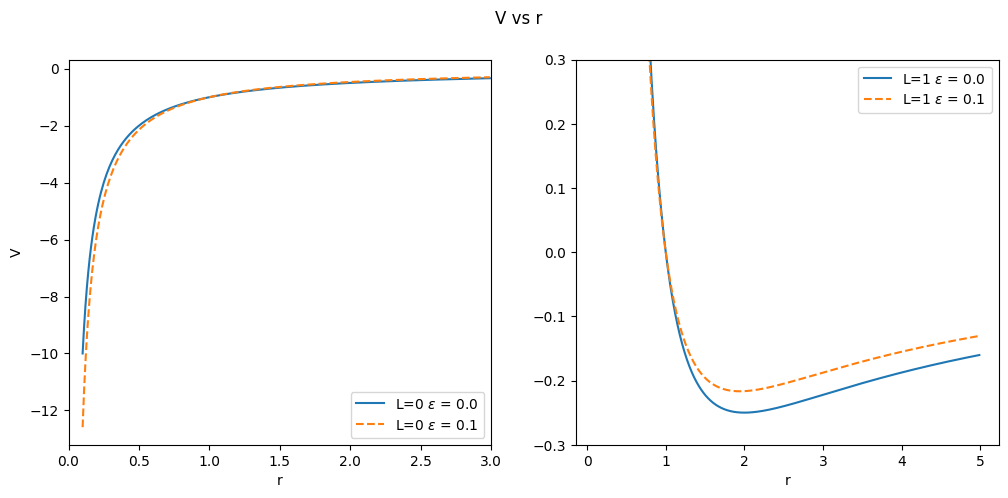

In [135]:
def Veff(r):
    # effective potential
    return L*(L+1)/(2*mass*r*r) -1/r**(1+eps)


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)

r = np.arange(0.1,3,0.01)
L , eps = 0 , 0
plt.plot(r,Veff(r),label='L=0 $\epsilon$ = 0.0')
plt.ylabel('V'),plt.xlabel('r')

L , eps = 0, 0.1
plt.plot(r,Veff(r),label='L=0 $\epsilon$ = 0.1',ls='--')
plt.xlim(0,3), plt.legend()

plt.subplot(1,2,2)
r = np.arange(0.1,5,0.01)
L , eps = 1,  0.0
plt.plot(r,Veff(r),label='L=1 $\epsilon$ = 0.0')

L ,eps = 1, 0.1
plt.plot(r,Veff(r),label='L=1 $\epsilon$ = 0.1',ls='--')
plt.ylim(-0.3,0.3),plt.legend(), plt.xlabel('r')
plt.suptitle('V vs r')



* From this we see that for $l =0 $,  $V_\epsilon = \frac{-1}{r^{1+ \epsilon}}$ (-- plot) falls faster than than $V = \frac{-1}{r}$. Which leads to a deeper (more negative) ground statei.e $1s$ state. But for larger n, the $n^2$ factor dominates and bound states of $V_\epsilon $ get higher (closer to zero) $2s, 3s $ etc.

* Whereas for $l\neq 0$, we see from the second plot that that the $V_{\text{eff}, \epsilon}$ is shallower than $V_{\text{eff}}$ and consequentially will have higher energy bound states for all $l \neq 0$ states as compared to the bound states of $V_{\text{eff}}$.

$E_1 = -0.49906443976052095 $ where as $E_{1eff} =-0.5391151974555104 $ are the energies of 1s state for $\epsilon =0, 0.1$ respectively. We plot the radial funtion $u$.

0.0 -0.49906443976052095
0.1 -0.5391151974555104


(Text(0.5, 0, 'r'), Text(0, 0.5, 'u'))

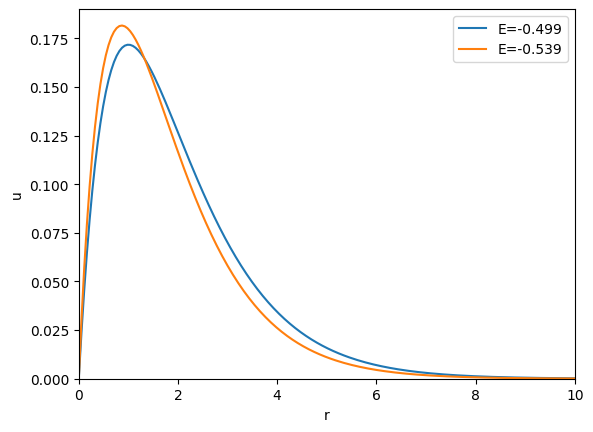

In [31]:
x = np.linspace(xL,xR,2200+1)   
xL, xR, N = 0., 120., 2200  
h, mass = (xR-xL)/N, 1.0  
M,L = 100 , 0 # Matchig Point, angluar qntm numbr
EL = [-0.49906443976052095,-0.5391151974555104]
eps_array = [0.0,0.1]
# plt.figure(figsize=(16,4))
for i in range(2):
    eps,E=eps_array[i],EL[i]
    print(eps,E)
    wfup, nup = numerov(f, [0,.1], M-1, xL, h)      # calc wf
    wfdn, ndn = numerov(f, [0,.1], N-M-1, xR, -h)
    psix = np.concatenate((wfup[:-1], wfdn[::-1]))
    psix[M:] *= wfup[-1]/wfdn[-1] 
    norm = np.linalg.norm(psix)
    psix = psix/norm
    # plt.axvline(16,c='grey',ls='--')
    # plt.subplot(1,2,i+1)
    plt.plot(x,psix,label='E='+str(round(E,3)))
    plt.legend()
    plt.xlim(0,10), plt.ylim(0,0.19)
plt.xlabel('r'), plt.ylabel('u')

From this plot we see that radial probailiity distribution of $1s$ state of modified potential has peak closer to $r=0$ and hence has more neagtive energy, as we claimed using the graphs of potentials above.

---
# Yukawa Potential

## Energy states plot for Z=1

In [19]:
# Define potenial
def Veff(r):   # effective potential
    '''
    Yukawa Potential
    a : screening factor
    Z : atomic number
    '''
    return L*(L+1)/(2*mass*r*r) -(Z*np.exp(-r/a))/r

n ,l , E =  1 0 -0.4511624703750068
n ,l , E =  2 0 -0.08169318234775497
n ,l , E =  3 0 -0.019333287973740645
n ,l , E =  4 0 -0.0030864151820927917
n ,l , E =  2 1 -0.08074065100106521
n ,l , E =  3 1 -0.018557827501026677
n ,l , E =  4 1 -0.0025975150034109186
n ,l , E =  3 2 -0.01691557057650564
n ,l , E =  4 2 -0.0015796064630317925


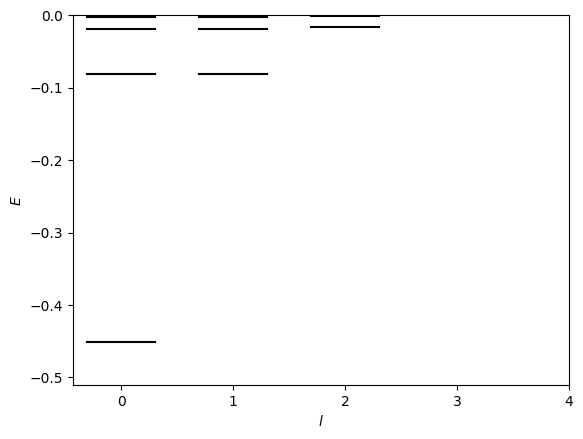

In [20]:
Z, a = 1, 20
xL, xR, N = 1e-10, 100., 2200          # limits, intervals
h, mass = (xR-xL)/N, 1.0            # step size, mass
Lmax, EL, M = 5, [], 100            # M = matching point
x = np.linspace(xL,xR,2200+1)
Estart, dE = np.linspace(-0.5, 0.0,Lmax+1), 0.0001      # $\sim -1/2n^2$
for L in range(Lmax):
    n, E1, Ea = L+1, Estart[L], []
    while (E1 < -4*dE):             # sweep E range for each L
        E1 += dE
        if (shoot(E1)*shoot(E1 + dE) > 0): continue
        E = bisect(shoot, E1, E1 + dE)
        Ea.append(E)
        wfup, nup = numerov(f, [0,.1], M-1, xL, h)      # calc wf
        wfdn, ndn = numerov(f, [0,.1], N-M-1, xR, -h)
        psix = np.concatenate((wfup[:-1], wfdn[::-1]))
        psix[M:] *= wfup[-1]/wfdn[-1]                   # match
        # print ('nodes, n,l,E=', nup+ndn, n, L, E)
        print ('n ,l , E = ', n, L, E)
        # plt.plot(x,psix/np.linalg.norm(psix))
        # plt.xlim(0,30)
        # plt.show()

        n += 1
    EL.append(Ea)
    
plt.figure()                        # plot energy levels
for L in range(Lmax):
    for i in range(len(EL[L])):
        plt.plot([L-.3, L+.3], [EL[L][i]]*2, 'k-')
        # print(L,i,EL[L][i])
    plt.xlabel('$l$'), plt.ylabel('$E$')
    plt.ylim(-.51, 0), plt.xticks(range(Lmax))
plt.show()
 

**Energy differnce between $2s$ and $2p$** \
$E_{2s} = -0.08169318234775497$ a.u and $E_{2p}=-0.08074065100106521$ a.u so energy differnce is $E_{2p}-E_{2p} \approx 0.0009523$ a.u 


# Expectationa Values
We will find $\langle T \rangle, \langle V \rangle, \langle H \rangle$ for $1s, 2p$ and $3d$ states which are the lowest energy states for $l= 0,1,2$ respectively. First we plot the states.

1 0 -0.4511624703750068
2 1 -0.08074065100106521
3 2 -0.01691557057650564


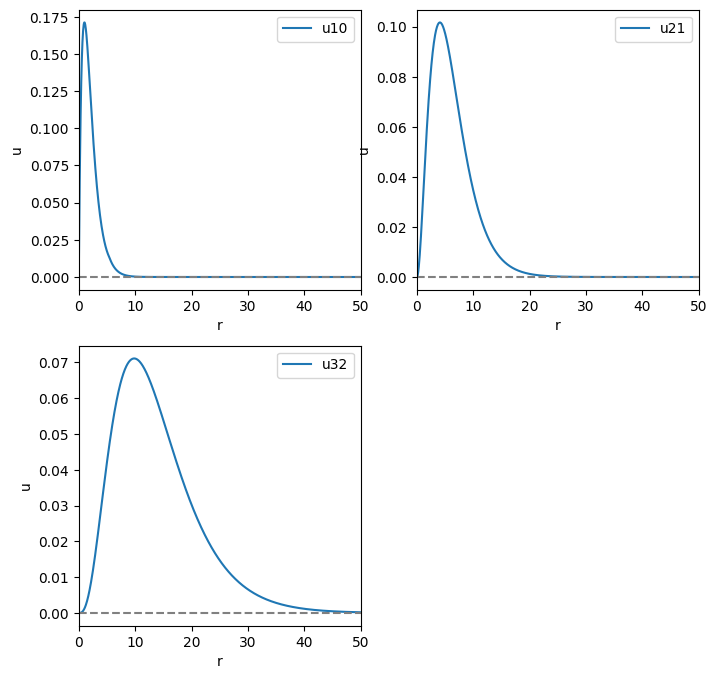

In [21]:
plt.figure(figsize=(8,8))
xL, xR, N = 1e-5, 120., 2200  
h, mass = (xR-xL)/N, 1.0   
x = np.linspace(xL,xR,2200+1)    
M = 100 # matching point
c= 1
psi = np.zeros((3,len(x)))
for L in range(3):
    E = EL[L][0]
    j=L+1
    print(j,L,E)
    wfup, nup = numerov(f, [0,.1], M-1, xL, h)      # calc wf
    wfdn, ndn = numerov(f, [0,.1], N-M-1, xR, -h)
    psix = np.concatenate((wfup[:-1], wfdn[::-1]))
    psix[M:] *= wfup[-1]/wfdn[-1] 
    psix = psix/np.linalg.norm(psix)
    psi[L,:]= psix
    plt.subplot(2,2,c)
    plt.plot(x,psix,label='u'+str(j)+str(L))
    plt.legend()
    plt.axhline(0,c='grey',ls='--')
    plt.xlim(0,50), plt.xlabel('r'), plt.ylabel('u')
    c+=1
    # plt.show()

**1s state**

In [73]:

L = 0
N = len(x) # Dimesnio of operator matrix
D_mat = np.zeros((N,N)) # Derivative operator matrix
V_mat = np.zeros((N,N)) # V(potential) operator matrix

# fill off diagonal terms of T matrix
for i in range(N-1):
    D_mat[i,i+1] = (1+(h*h/6)*f(x[i+1]))/(2*h)
    D_mat[i+1,i] = -(1+(h*h/6)*f(x[i]))/(2*h)

# fill diagonal terms of T and V matrix
for i in range(N):
    V_mat[i,i] = Veff(x[i])


psi00 = psi[L,:]
T_exp = np.matmul(np.matmul(D_mat,psi00),np.matmul(D_mat,psi00))/2
V_exp = np.matmul(psi00,np.matmul(V_mat,psi00))
# print(x[0],V_mat)
print('<T> = ',T_exp )
print('<V> = ',V_exp )
print('<H> = ',T_exp + V_exp )
print('-<V>/2 = ',-V_exp/2 )



<T> =  0.4689488994749954
<V> =  -0.9439277983941423
<H> =  -0.4749788989191469
-<V>/2 =  0.47196389919707116


**2s state**

In [74]:

L = 1
N = len(x) # Dimesnio of operator matrix
D_mat = np.zeros((N,N)) # Derivative operator matrix
V_mat = np.zeros((N,N)) # V(potential) operator matrix

# fill off diagonal terms of T matrix
for i in range(N-1):
    D_mat[i,i+1] = (1+(h*h/6)*f(x[i+1]))/(2*h)
    D_mat[i+1,i] = -(1+(h*h/6)*f(x[i]))/(2*h)

# fill diagonal terms of T and V matrix
for i in range(N):
    V_mat[i,i] = Veff(x[i])


psi00 = psi[L,:]
T_exp = np.matmul(np.matmul(D_mat,psi00),np.matmul(D_mat,psi00))/2
V_exp = np.matmul(psi00,np.matmul(V_mat,psi00))
# print(x[0],V_mat)
print('<T> = ',T_exp )
print('<V> = ',V_exp )
print('<H> = ',T_exp + V_exp )
print('-<V>/2 = ',-V_exp/2 )



<T> =  0.03956538048322842
<V> =  -0.1203020745512592
<H> =  -0.08073669406803077
-<V>/2 =  0.0601510372756296


**3d state**

In [75]:

L = 2
N = len(x) # Dimesnio of operator matrix
D_mat = np.zeros((N,N)) # Derivative operator matrix
V_mat = np.zeros((N,N)) # V(potential) operator matrix

# fill off diagonal terms of T matrix
for i in range(N-1):
    D_mat[i,i+1] = (1+(h*h/6)*f(x[i+1]))/(2*h)
    D_mat[i+1,i] = -(1+(h*h/6)*f(x[i]))/(2*h)

# fill diagonal terms of T and V matrix
for i in range(N):
    V_mat[i,i] = Veff(x[i])


psi00 = psi[L,:]
T_exp = np.matmul(np.matmul(D_mat,psi00),np.matmul(D_mat,psi00))/2
V_exp = np.matmul(psi00,np.matmul(V_mat,psi00))
# print(x[0],V_mat)
print('<T> = ',T_exp )
print('<V> = ',V_exp )
print('<H> = ',T_exp + V_exp )
print('-<V>/2 = ',-V_exp/2 )



<T> =  0.00859239853727288
<V> =  -0.02550796925993854
<H> =  -0.01691557072266566
-<V>/2 =  0.01275398462996927


We see that the virial theorem is not satisfied. However for 1s state, its approximately true. The reason for this is that 1s state is very close to $r=0$. And close to $r=0$, the Yukawa potential behaves like coulomb potenial, which satisfies Virial Theorem. Whereas for other Rydberg states, size increases as $n^2$. As can be seen from the plot below.

1 0 -0.4511624703750068
2 1 -0.08074065100106521
3 2 -0.01691557057650564


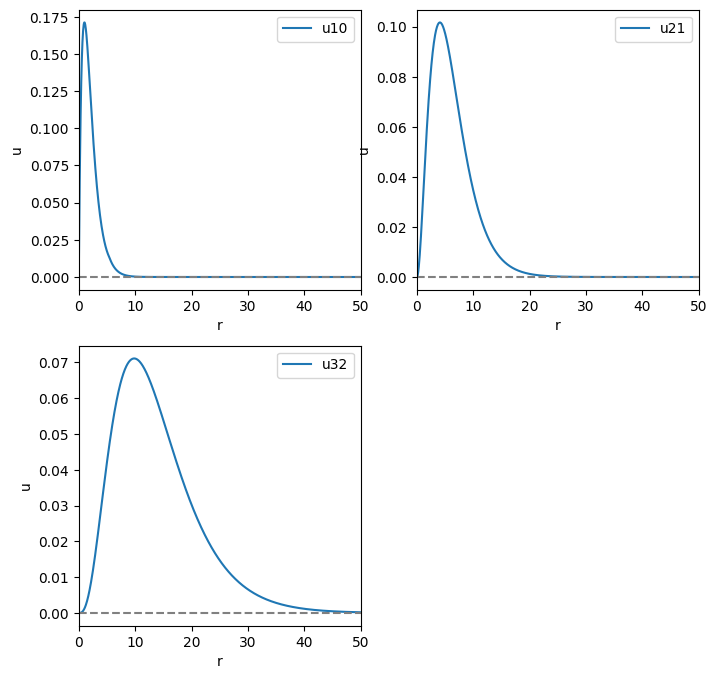

In [76]:
plt.figure(figsize=(8,8))
xL, xR, N = 1e-5, 120., 2200  
h, mass = (xR-xL)/N, 1.0   
x = np.linspace(xL,xR,2200+1)    
M = 100 # matching point
c= 1
psi = np.zeros((3,len(x)))
for L in range(3):
    E = EL[L][0]
    j=L+1
    print(j,L,E)
    wfup, nup = numerov(f, [0,.1], M-1, xL, h)      # calc wf
    wfdn, ndn = numerov(f, [0,.1], N-M-1, xR, -h)
    psix = np.concatenate((wfup[:-1], wfdn[::-1]))
    psix[M:] *= wfup[-1]/wfdn[-1] 
    psix = psix/np.linalg.norm(psix)
    psi[L,:]= psix
    plt.subplot(2,2,c)
    plt.plot(x,psix,label='u'+str(j)+str(L))
    plt.legend()
    plt.axhline(0,c='grey',ls='--')
    plt.xlim(0,50), plt.xlabel('r'), plt.ylabel('u')
    c+=1
    # plt.show()

# for Z=2

n ,l , E =  1 0 -0.4058715545669302
n ,l , E =  2 0 -0.13697050500963157
n ,l , E =  3 0 -0.04988327315006595
n ,l , E =  4 0 -0.016050736211278997
n ,l , E =  5 0 -0.003246062044838077
n ,l , E =  2 1 -0.40597860500762983
n ,l , E =  3 1 -0.13631855503572135
n ,l , E =  4 1 -0.049178420114050464
n ,l , E =  5 1 -0.015463660868535178
n ,l , E =  6 1 -0.0028550155694581827
n ,l , E =  3 2 -0.1342924890433968
n ,l , E =  4 2 -0.047481796163838005
n ,l , E =  5 2 -0.014162576795141433
n ,l , E =  6 2 -0.002033102605263953
n ,l , E =  4 3 -0.04487284317464784
n ,l , E =  5 3 -0.012146558438252682
n ,l , E =  6 3 -0.0007888561502211209
n ,l , E =  5 4 -0.009306372412544549


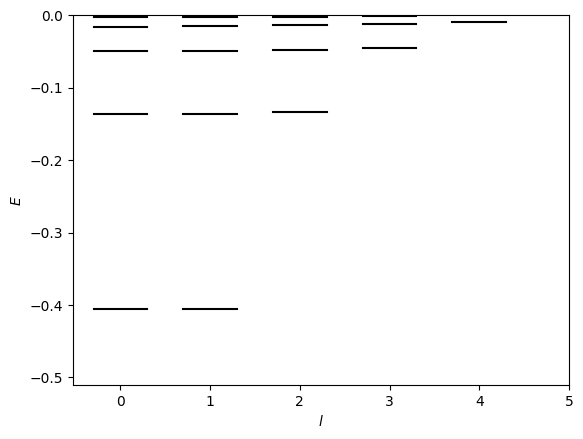

In [78]:
Z, a = 2, 20
xL, xR, N = 1e-10, 100., 2200          # limits, intervals
h, mass = (xR-xL)/N, 1.0            # step size, mass
Lmax, EL, M = 6, [], 100            # M = matching point
x = np.linspace(xL,xR,2200+1)
Estart, dE = np.linspace(-0.5, 0.0,Lmax+1), 0.0001      # $\sim -1/2n^2$
for L in range(Lmax):
    n, E1, Ea = L+1, Estart[L], []
    while (E1 < -4*dE):             # sweep E range for each L
        E1 += dE
        if (shoot(E1)*shoot(E1 + dE) > 0): continue
        E = bisect(shoot, E1, E1 + dE)
        Ea.append(E)
        wfup, nup = numerov(f, [0,.1], M-1, xL, h)      # calc wf
        wfdn, ndn = numerov(f, [0,.1], N-M-1, xR, -h)
        psix = np.concatenate((wfup[:-1], wfdn[::-1]))
        psix[M:] *= wfup[-1]/wfdn[-1]                   # match
        # print ('nodes, n,l,E=', nup+ndn, n, L, E)
        print ('n ,l , E = ', n, L, E)
        # plt.plot(x,psix/np.linalg.norm(psix))
        # plt.xlim(0,30)
        # plt.show()

        n += 1
    EL.append(Ea)
    
plt.figure()                        # plot energy levels
for L in range(Lmax):
    for i in range(len(EL[L])):
        plt.plot([L-.3, L+.3], [EL[L][i]]*2, 'k-')
        # print(L,i,EL[L][i])
    plt.xlabel('$l$'), plt.ylabel('$E$')
    plt.ylim(-.51, 0), plt.xticks(range(Lmax))
plt.show()
 

**Number of bound states and Comparison btw Z=1 and Z=2** \
* We see that number of bound states are finite as there are no bound states for $Z=1, l>2$.
* For $Z=2$, there are no bound states for $l>4$. As seen in the plot above.
